# Long Short Term Memory (LSTM) Model :

- LSTM excels in sequence prediction tasks, capturing long-term dependencies. 
- It's a type of RNN that uses memory cells to store information over time.
- LSTM is particularly useful for tasks like language modeling, speech recognition, and time series forecasting.
- However, it can be computationally expensive and may require a lot of data to train effectively.
- LSTM is a type of Recurrent Neural Network (RNN) that uses memory cells to store
information over time.

**Import the libraries**

In [29]:
#Import the libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Import the tensorflow:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

**Load the dataset**

In [30]:
#Load the dataset of flights:
flights = sns.load_dataset('flights')

In [31]:
#Convert the dataset into DataFrame:
df = pd.DataFrame({'Value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))

In [32]:
#Head of dataset:
df.head()

,Value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [33]:
#Split the Dataset:
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

**Normalize the data**

In [34]:
#Normalize the data:
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean)/train_std
test_data = (test_data - train_mean)/train_std 

**Convert the data into the Sequence**

In [35]:
#Now convert the data into a Sequence:
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length-1):
        X_seq = data[i : (i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)
seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)        

In [36]:
#Now reshape the dataset:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Apply the LSTM Model:

In [37]:
#Define the Model:
model = Sequential([
    LSTM(32, input_shape=(seq_length, 1)),
    Dense(1),
])

c:\Users\Al Hafiz Enterprises\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
#Complie the Model:
model.compile(optimizer='adam', loss='mse')

In [39]:
#Train the Model:
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.0024
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8762 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7320  
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6355 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5609 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4149 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3421
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2671 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2229 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1975 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1852
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1667
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1527 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1796
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1537 
Epoch 16/100
4/

In [40]:
#Evaluate the Model:
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - loss: 1.3763
Test loss: 1.3762612342834473


In [41]:
#Predict the values:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


In [42]:
y_test.shape

(16,)

In [43]:
y_pred.shape

(16, 1)

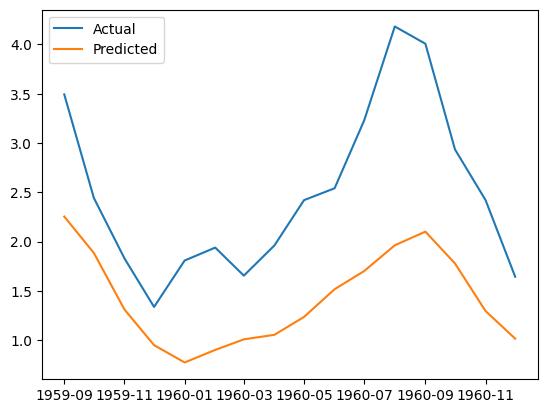

In [44]:
#Plot the Model:
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()